In [42]:
from PIL import Image, ImageEnhance, ImageOps
import os
import numpy as np
import pandas as pd

# Set wd to current file's location
path = 'C:/ARCHIVIO/2 - Magistrale/Semestre 3/Advanced statistical modelling fot Big Data/Progetto/Cells'

In [58]:
names0 = os.listdir(os.path.join(path, 'data', 'Uninfected'))
names1 = os.listdir(os.path.join(path, 'data', 'Parasitized'))

img0 = Image.open(os.path.join(path, 'data', 'Uninfected', names0[3]))
img1 = Image.open(os.path.join(path, 'data', 'Parasitized', names1[9]))

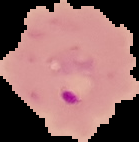

In [59]:
# Raw image
img = img1
img.save('plot/originale.png')
img

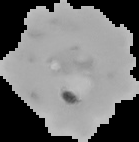

In [60]:
# Create B/W
opt = img.convert(mode='L')
opt.save('plot/bw.png')
opt

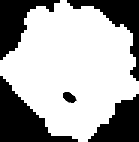

In [61]:
# Create contrast enhanced
enhancer = ImageEnhance.Contrast(opt)
opt = enhancer.enhance(20)
opt.save('plot/contrast.png')
opt

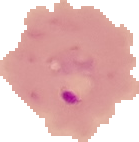

In [62]:
# Create Mask
mask = img
pixels_mask = mask.load()
for i in range(mask.size[0]):
    for j in range(mask.size[1]):
        if pixels_mask[i,j] == (0,0,0):
            pixels_mask[i,j] = (255, 255, 255)

mask.save('plot/mask.png')
mask

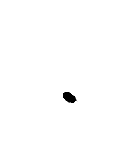

In [64]:
# Join Mask over B/W
pixels_opt = opt.load()
for i in range(mask.size[0]):
    for j in range(mask.size[1]):
        if pixels_mask[i,j] == (255, 255, 255):
            pixels_opt[i,j] = 255

opt.save('plot/join.png')
opt

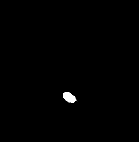

In [65]:
# Invert
opt = ImageOps.invert(opt)
opt.save('plot/inverse.png')
opt

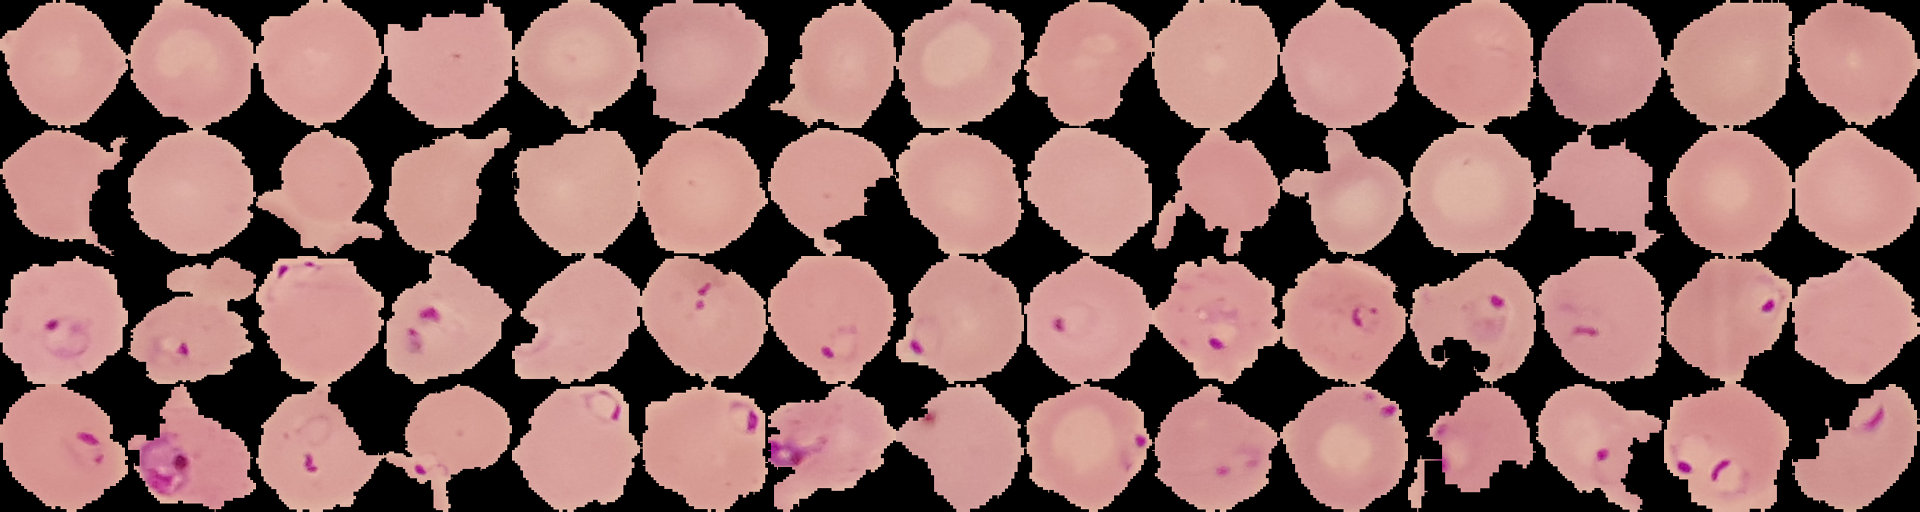

In [41]:
folders = ['Uninfected', 'Parasitized']
images = []

for cat in [0,1]:
    names = os.listdir(os.path.join('data', folders[cat]))
    i = 0
    for name in names:
          img = Image.open(os.path.join('data', folders[cat], name))
          images.append(img.resize((128,128)))
          i += 1
          if i == 30: break 

widths, heights = zip(*(i.size for i in images))

total_width = 128*15
max_height = 128*4

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
y_offset = 0
i = 0
for im in images:
  new_im.paste(im, (x_offset, y_offset))
  x_offset += im.size[0]
  
  i += 1
  if (i % 15) == 0:
          x_offset = 0
          y_offset += im.size[1]
        
  
new_im.save('plot/mosaic.pdf')
new_im